<a href="https://colab.research.google.com/github/abhiruppeeyalsinha/Vision-Transformer-ViT-Using-Transformers-for-Image-Classification/blob/main/Vision_Transformer_(ViT)_Using_Transformers_for_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

In [2]:
!pip install -q transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 88.2 MB/s eta 0:00:00


In [6]:
from transformers import ViTFeatureExtractor, ViTForImageClassification
import cv2
from PIL import Image 
from google.colab.patches import cv2_imshow

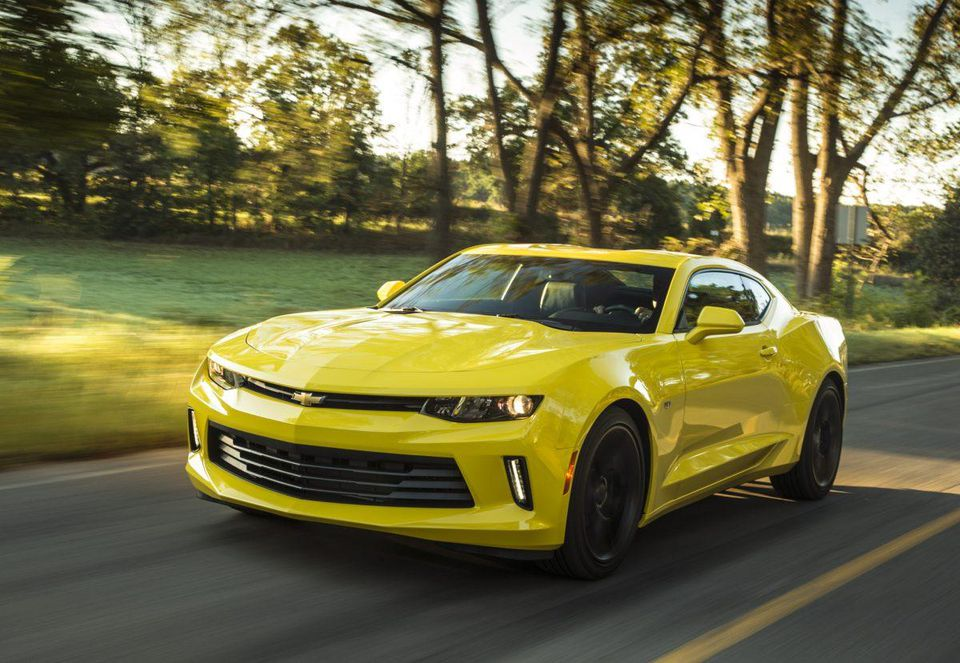

In [44]:
img_file = r"/content/test_image.jpg"
img = cv2.imread(img_file)
cv2_imshow(img)


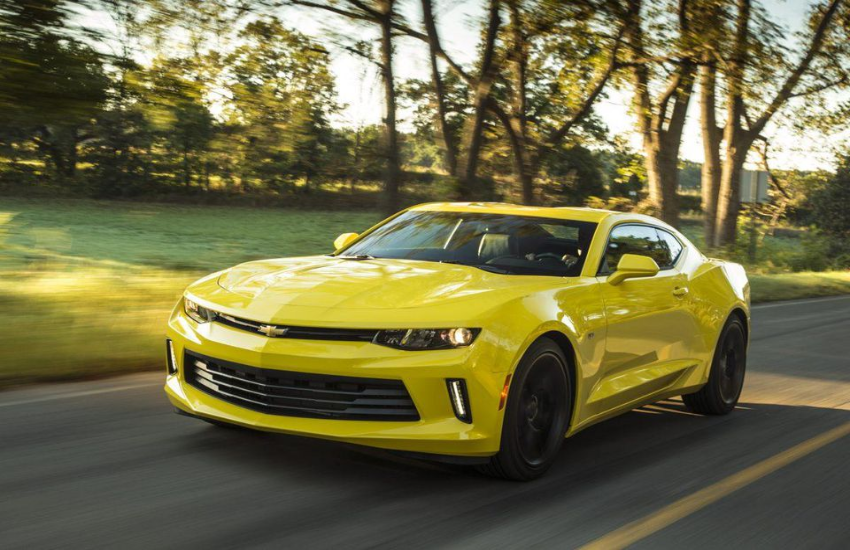

In [45]:
img = cv2.resize(img,(850,550))
cv2_imshow(img)


In [27]:
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [46]:
from transformers.models.owlvit.modeling_owlvit import OWLVIT_IMAGE_GUIDED_OBJECT_DETECTION_INPUTS_DOCSTRING
inputs = feature_extractor(images = img,return_tensors='pt')

output = model(**inputs)
logits = output.logits #probabilty scr for different classes are exits

In [47]:
logits.shape
#[1, 1000] 1000 different number of classes and 1 is probabilty max. scr

torch.Size([1, 1000])

In [48]:
predicted_class_idx = logits.argmax(-1).item()
predicted_class_idx


817

# extract the id of the max. value of the image

In [49]:
print(f"prediction:- {model.config.id2label[predicted_class_idx]}")

prediction:- sports car, sport car
